# Problém batohu
Základ problému
Je dáno

- celé číslo `n` (počet věcí)
- celé číslo `M` (kapacita batohu)
- konečná množina `V = {v1, v2, ... ,vn }` (hmotnosti věcí)
- konečná množina `C = {c1, c2, ... ,cn }` (ceny věcí)

In [1]:
import enum

class Method(enum.Enum):
    BF = 1    # Brute Force method
    BAB = 2   # Branch and Bound method

Definice Třídy Knapsack řešící problém a uchovávající výsledek

In [8]:
class Knapsack:
    def __init__(self, initString):
        arr = initString.split()
        decisionProblem = int(arr[0]) < 0
        items = arr[4:] if decisionProblem else arr[3:]
        
        self.id = int(arr[0])
        self.n = int(arr[1])
        self.M = int(arr[2])
        self.B = int(arr[3]) if decisionProblem else None
        self.weights = list(map(lambda x: int(x), items[::2]))
        self.prices = list(map(lambda x: int(x), items[1::2]))
        self.solution = None
        self.solutionPrice = None
        self.decisionSolution = None
        self.initString = initString
        self.outputString = None
        self.stepsToSolve = None
        
    def __str__ (self):
        res = "KNAPSACK " + str(self.id) + "\n"
        res += "-----------------------------------" + "\n"
        res += "n = " + str(self.n) + "\tM = " + str(self.M) + "\tB = " + (str(self.B) if self.B else "--") + "\n"
        
        for (i, x) in enumerate(self.weights):
            res += "#" + str(i) + "\t" + str(x) + "\t" + str(self.prices[i]) + "\t\t" + (str(self.solution[i]) if self.solution is not None else "") + "\n"
        res += "-----------------------------------" + "\n"
        res += "CONSTRUCTIVE PROBLEM SOLUTION:\t" + (str(self.solutionPrice) if self.solutionPrice is not None else "--") + "\n"
        res += "DECISION PROBLEM SOLUTIONS:\t#" + (str(len(self.decisionSolution)) if self.decisionSolution is not None else "--") + "\n"
        res += "-----------------------------------" + "\n"
        
        return res
    
    def createOutputString(self):
        self.outputString = str(abs(self.id)) + " " + str(self.n) + " " + str(self.solutionPrice)
        if len(self.solution) == 0:
            self.solution = [0] * self.n
        for s in self.solution:
            self.outputString += " " + str(s)    
    
    def __repr__ (self):
        return self.outputString if self.outputString is not None else "--"
    
    def getSolution(self):
        return self.__repr__()
    
    def getStepsToSolve(self):
        return self.stepsToSolve
    
    def getItemsInfo(self, arr):
        finalWeight = 0
        finalPrice = 0
        
        for (i, inKnapsack) in enumerate(arr):
            finalWeight += self.weights[i] if inKnapsack else 0
            finalPrice += self.prices[i] if inKnapsack else 0
            
        return (finalWeight, finalPrice)
    
    def solutionIsEmpty(self):
        return len(self.decisionSolution) == 0
    
    def getB(self):
        return self.B
    
    # Brute Force for constructive 0/1 problem
    def bruteForceAux(self, W, wt, val, n):
        # Base Case
        if n == 0 or W == 0:
            return (0, [])

        if (wt[n-1] > W):
            x = self.bruteForceAux(W, wt, val, n-1)
            path = x[1]
            path.append(0)
            return (x[0], path)

        else:
            x = self.bruteForceAux(W-wt[n-1], wt, val, n-1)
            y = self.bruteForceAux(W, wt, val, n-1)
            if x[0] + val[n-1] > y[0]:
                path = x[1]
                path.append(1)
                return (x[0] + val[n-1], path)
            else:
                path = y[1]
                path.append(0)
                return (y[0], path)
    
    def bruteForceSolve(self):
        x =  self.bruteForceAux(self.M, self.weights, self.prices, self.n)
        self.solution = x[1]
        self.solutionPrice = x[0]
        self.createOutputString()
        return x
    
    # Brute Force for decision 0/1 problem
    def decisionBruteForceSolve(self):
        self.solutionPrice = 0
        self.decisionSolution = []
        self.stepsToSolve = 2**self.n
        for i in range(2**self.n):
            x = ("{0:0" + str(self.n) + "b}").format(i)
            finalPrice = 0
            finalWeight = 0
            for (j, b) in enumerate(x):
                if int(b):
                    finalPrice += int(self.prices[j])
                    finalWeight += int(self.weights[j])
            if finalWeight <= self.M:
                if finalPrice > self.solutionPrice:
                    self.solutionPrice = finalPrice
                    self.solution = list(x)
                if finalPrice >= self.B:
                    self.decisionSolution.append(list(x))
        # no solution found
        if self.solution is None:
            self.solution = []
        
        self.createOutputString()
        return self.decisionSolution
    
    # Branch and Bound method for constructive 0/1 problem
    def decisionBabSolveAux(self, n, M, B, weights, prices, acc):
        # stop conditions
        if n == 0:
            print(acc[::-1])
            self.stepsToSolve += 1
            if M >= 0 and B <= 0:
                self.decisionSolution.append(acc[::-1])
            return
        
        # following subtree won't satisfy price boundary 
        if sum(prices) < B:
            return
        
        # item doesn't fit into knapsack
        if (weights[n-1] > M):
            self.decisionBabSolveAux(n - 1, M, B, weights[:n - 1], prices[:n - 1], acc + [0])
            return
        
        # item fits in knapsack
        else:
            # item fits and is added into knapsack
            self.decisionBabSolveAux(n - 1, M - weights[n - 1], B - prices[n - 1], weights[:n - 1], prices[:n - 1], acc + [1])
            # item fits but isn't added into knapsack
            self.decisionBabSolveAux(n - 1, M, B, weights[:n - 1], prices[:n - 1], acc + [0])
    
    def returnSecondEl(self, e):
        return e[1]
    
    def decisionBabSolve(self):
        self.decisionSolution = []
        self.stepsToSolve = 0
        self.decisionBabSolveAux(self.n, self.M, self.B, self.weights, self.prices, [])
        
        # find and save bestSolution (constructive problem)
        maxPrice = 0
        maxPriceIndex = -1       
        for (i, sol) in enumerate(self.decisionSolution):
            _, price = self.getItemsInfo(sol)
            if price > maxPrice:
                maxPrice = price
                maxPriceIndex = i
        
        self.solution = [] if maxPriceIndex == -1 else self.decisionSolution[maxPriceIndex]
        self.solutionPrice = maxPrice
        
        self.createOutputString()

In [3]:
k1 = Knapsack("-1 20 1141 13810 36 574 1 253 43 636 113 1266 202 2068 10 334 149 1588 209 2126 28 495 65 831 54 736 74 913 147 1567 30 520 151 1603 61 795 16 386 142 1528 214 2176 115 1278")
# k2 = Knapsack("-1 25 1577 6257 36 3 43 1129 202 94 149 2084 28 646 54 737 147 300 151 605 16 1420 214 1142 68 2253 238 1541 245 1413 8 221 7 1939 137 1284 165 1174 183 500 122 1525 23 1003 136 221 200 1755 127 741 173 80 165 2339")
k2 = Knapsack("-1 20 1213 5042 36 3 43 1129 202 94 149 2084 28 646 54 737 147 300 151 605 16 1420 214 1142 68 2253 238 1541 245 1413 8 221 7 1939 137 1284 165 1174 183 500 122 1525 23 1003")
print("ZR")
k1.decisionBabSolve()
print(k1.getStepsToSolve())
print("NR")
k2.decisionBabSolve()
print(k2.getStepsToSolve())
print(k1)
print(k2)

ZR
20 1141 13810
50410
NR
20 1213 5042
713996
KNAPSACK -1
-----------------------------------
n = 20	M = 1141	B = 13810
#0	36	574		1
#1	1	253		1
#2	43	636		1
#3	113	1266		1
#4	202	2068		1
#5	10	334		1
#6	149	1588		0
#7	209	2126		0
#8	28	495		1
#9	65	831		1
#10	54	736		1
#11	74	913		1
#12	147	1567		0
#13	30	520		1
#14	151	1603		1
#15	61	795		1
#16	16	386		1
#17	142	1528		1
#18	214	2176		0
#19	115	1278		1
-----------------------------------
CONSTRUCTIVE PROBLEM SOLUTION:	14216
DECISION PROBLEM SOLUTIONS:	#138
-----------------------------------

KNAPSACK -1
-----------------------------------
n = 20	M = 1213	B = 5042
#0	36	3		0
#1	43	1129		1
#2	202	94		0
#3	149	2084		1
#4	28	646		1
#5	54	737		1
#6	147	300		0
#7	151	605		1
#8	16	1420		1
#9	214	1142		0
#10	68	2253		1
#11	238	1541		1
#12	245	1413		0
#13	8	221		1
#14	7	1939		1
#15	137	1284		1
#16	165	1174		1
#17	183	500		0
#18	122	1525		1
#19	23	1003		1
-----------------------------------
CONSTRUCTIVE PROBLEM SOLUTION:	17561
DECISION PROBLEM

In [9]:
k3 = Knapsack("-1 4 123 1475 36 574 1 253 43 636 113 1266")
k4 = Knapsack("-1 4 46 324 36 3 43 1129 202 94 149 2084")
k5 = Knapsack("-2 4 131 7 65 540 74 1463 30 1503 61 151")
print("ZR")
k3.decisionBabSolve()
print(k3.getStepsToSolve())
print("NR")
k4.decisionBabSolve()
print(k4.getStepsToSolve())
print("NR 2")
k5.decisionBabSolve()
print(k5.getStepsToSolve())

ZR
[0, 1, 0, 1]
[0, 0, 0, 1]
2
NR
[0, 1, 0, 0]
1
NR 2
[0, 0, 1, 1]
[1, 0, 0, 1]
[0, 0, 0, 1]
[0, 1, 1, 0]
[1, 0, 1, 0]
[0, 0, 1, 0]
[0, 1, 0, 0]
[1, 0, 0, 0]
[0, 0, 0, 0]
9


Definice třídy InstanceManager, která spouští a kontroluje řešení jednotlivých instancí batohu pro určité *n*

In [3]:
from statistics import mean

class InstanceManager:
    def __init__(self, stringInstances, stringInstancesSolutions):
        self.instancesStrings = stringInstances.split("\n")[:-1] # last is empty line
#         self.instances = []
        self.instancesSolutions = []
        for _ in range(500):
            self.instancesSolutions.append([])
        self.stepsOfInstances = None
        
        for solution in stringInstancesSolutions.split("\n")[:-1]:
            idOfInstance = int(solution.split(' ')[0])
            self.instancesSolutions[idOfInstance - 1].append(solution)
        
#         for instanceString in self.instancesStrings:
#             self.instances.append(Knapsack(instanceString))
            
    def checkInstances(self, method):
        fail = 0
        self.stepsOfInstances = []
        
        for (i, instanceString) in enumerate(self.instancesStrings):
            
            inst = Knapsack(instanceString)
            inst.decisionBruteForceSolve() if method == Method.BF else inst.decisionBabSolve()
            self.stepsOfInstances.append(inst.getStepsToSolve())
            
            if (i + 1) % 10 == 0:
                print("#{}".format(i + 1), end=", ")
            
            if inst.getSolution() not in self.instancesSolutions[i]:
                correctConstructivePrice = int(self.instancesSolutions[i][0].split(' ')[2])
                if inst.solutionIsEmpty() and correctConstructivePrice < inst.getB():
                    continue
                
                fail += 1
                print("\nInstance is incorrect: Expected: ")
                for i in self.instancesSolutions[i]:
                    print("\t\t\t\t" + i)
                print("\t\t\tGiven:   " + inst.getSolution())
        print("\n")
        
        if fail > 0:
            print("FAILS: {}/{}".format(str(fail), "500"))
        else:
            print("SUCCESS")
            
        avgStep = mean(self.stepsOfInstances)
        print("Average number of steps: {}".format(round(avgStep,2)))
        print("---------")
        return self.stepsOfInstances

Definice třídy InstanceSetManager ,která řídí spouštění sad o různých velikostech *n*

In [4]:
import os
from pathlib import Path

class InstanceSetManager:
    def __init__ (self, pathToSet, setChar):
        self.setChar = setChar
        self.pathToSet = pathToSet
        self.filesInDirectory = os.listdir(pathToSet)
        self.ns = set()
        for f in self.filesInDirectory:
            n = f.replace("{}R".format(setChar), "").replace("{}K".format(setChar), "").replace("_inst.dat", "").replace("_sol.dat", "")
            self.ns.add(int(n))
            
    def solve(self, method, maxN=22):
        for n in sorted(self.ns):
            if n > maxN:
                break
                
            print("---------")
            print("INSTANCES n = {}".format(str(n)))    
            
            instanceFile = self.setChar + "R" + str(n) + "_inst.dat"
            solutionFile = self.setChar + "K" + str(n) + "_sol.dat"
            
            txt = Path(self.pathToSet + instanceFile).read_text()
            txtSol = Path(self.pathToSet + solutionFile).read_text()
            txtSol = txtSol.replace(" \n", "\n")
            manager = InstanceManager(txt, txtSol)
            
            steps = manager.checkInstances(method)
            f = open("results/{}R{}_{}.txt".format(self.setChar, n, "bb" if method == Method.BAB else "bf"), "w")
            nl = "\n"
            f.write(nl.join(map(lambda x: str(x), steps)) + "\n")
            f.close()
            

## Výpočet rozhodovacího problému batohu
následující buňky počítají sady *NR* a *ZR* pomocí obou metod -- Hrubá síla a metoda větví a hranic

In [ ]:
a = InstanceSetManager("ZR/", "Z")
a.solve(Method.BAB)

>> ZK37_sol.dat
>> ZR20_inst.dat
>> ZK32_sol.dat
>> ZK40_sol.dat
>> ZR27_inst.dat
>> ZR4_inst.dat
>> ZK22_sol.dat
>> ZK25_sol.dat
>> ZR37_inst.dat
>> ZK27_sol.dat
>> ZR35_inst.dat
>> ZR10_inst.dat
>> ZR15_inst.dat
>> ZK4_sol.dat
>> ZK10_sol.dat
>> ZR30_inst.dat
>> ZK30_sol.dat
>> ZR40_inst.dat
>> ZR25_inst.dat
>> ZR22_inst.dat
>> ZK15_sol.dat
>> ZK20_sol.dat
>> ZR32_inst.dat
>> ZK35_sol.dat
---------
INSTANCES n = 4
#10, #20, #30, #40, #50, #60, #70, #80, #90, #100, #110, #120, #130, #140, #150, #160, #170, #180, #190, #200, #210, #220, #230, #240, #250, #260, #270, #280, #290, #300, #310, #320, #330, #340, #350, #360, #370, #380, #390, #400, #410, #420, #430, #440, #450, #460, #470, #480, #490, #500, 

SUCCESS
Average number of steps: 3.16
---------
---------
INSTANCES n = 10
#10, #20, #30, #40, #50, #60, #70, #80, #90, #100, #110, #120, #130, #140, #150, #160, #170, #180, #190, #200, #210, #220, #230, #240, #250, #260, #270, #280, #290, #300, #310, #320, #330, #340, #350, #360, #370,

In [ ]:
b = InstanceSetManager("NR/", "N")
b.solve(Method.BAB)

In [ ]:
c = InstanceSetManager("ZR/", "Z")
c.solve(Method.BF, 10)

In [ ]:
d = InstanceSetManager("NR/", "N")
d.solve(Method.BF, 10)

## Analýza
následující buňka zadefinuje analyzátor uložených dat a v dalších buňkách je spuštěna samotná analýza

In [5]:
import statistics
import matplotlib.pyplot as plt 
import numpy as np

class Analyzer:
    def __init__(self):
        self.directory = "results/"
        self.filesInDirectory = os.listdir(self.directory)
        self.NRresultsBF = set()
        self.NRresultsBB = set()
        self.ZRresultsBB = set()
        self.ZRresultsBF = set()
        
        for file in self.filesInDirectory:
            if file[0] == 'N':
                if "bf" in file:
                    self.NRresultsBF.add(file)
                else:
                    self.NRresultsBB.add(file)
            else:
                if "bf" in file:
                    self.ZRresultsBF.add(file)
                else:
                    self.ZRresultsBB.add(file)            
    
    # from https://realpython.com/python-histograms/
    def getStats(self, content, printChart=False):
        data = content.split("\n")[:-1]
        data = list(map(lambda x: int(x), data))
        mean = round(statistics.mean(data), 3)
        variance = round(statistics.variance(data), 3)
        maximum = max(data)
        minimum = min(data)
        print("\tmean={}\n\tvar={}\n\tmax={}\n\tmin={}".format(str(mean), str(variance), str(maximum), str(minimum)))
        
        if printChart:
            # An "interface" to matplotlib.axes.Axes.hist() method
            n, bins, patches = plt.hist(x=data, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
            plt.grid(axis='y', alpha=0.75)
            plt.xlabel('# of operations')
            plt.ylabel('Frequency')
            plt.title('Distribution of # of operations')
            maxfreq = n.max()
            # Set a clean upper y-axis limit.
            plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
            plt.show()
        
        return [mean, variance, maximum, minimum]
            
    def analyze(self, instSet, minN=0, maxN=40):
        if instSet != 'NR' and instSet != 'ZR':
            print("Bad input")
            return
        
        meanBF = []
        varianceBF = []
        maximumBF = []
        minimumBF = []
        nsBF = []
        
        print("Brute Force")
        print("---------------")
        for file in (self.NRresultsBF if instSet == "NR" else self.ZRresultsBF):
            print(file)
            n = int(file.replace(instSet, "").replace("_bf.txt", ""))
            nsBF.append(n)
            
            f = open(self.directory + file, "r")
            x = f.read()
            [mean, variance, maximum, minimum] = self.getStats(x, False)
            meanBF.append(mean)
            varianceBF.append(variance)
            maximumBF.append(maximum)
            minimumBF.append(minimum)
            f.close()
            
        meanBB = []
        varianceBB = []
        maximumBB = []
        minimumBB = []
        nsBB = []
        
        print("\nBranch & Bound")
        print("---------------")
        for file in (self.NRresultsBB if instSet == "NR" else self.ZRresultsBB):
            print(file)
            n = int(file.replace(instSet, "").replace("_bb.txt", ""))
            nsBB.append(n)
            
            f = open(self.directory + file, "r")
            x = f.read()
            [mean, variance, maximum, minimum] = self.getStats(x, True)
            meanBB.append(mean)
            varianceBB.append(variance)
            maximumBB.append(maximum)
            minimumBB.append(minimum)
            f.close()
        
        meanBF.sort()
        meanBB.sort()
        nsBB.sort()
        labels = nsBB
        plt.bar(np.arange(len(nsBF)), meanBF, width=0.3)    
        plt.bar(np.arange(len(nsBB))+ 0.3, meanBB, width=0.3)
        plt.xticks(range(len(nsBB)), labels)
        plt.xlabel('n')
        plt.ylabel('# operations')
        plt.title('{} set'.format(instSet))
        plt.legend(['Brute Force', 'B&B'])
        plt.yscale("log")
        plt.show()
        

Brute Force
---------------
ZR10_bf.txt
	mean=1024
	var=0
	max=1024
	min=1024
ZR4_bf.txt
	mean=16
	var=0
	max=16
	min=16

Branch & Bound
---------------
ZR22_bb.txt
	mean=82840.82
	var=7176025440.697
	max=350659
	min=0


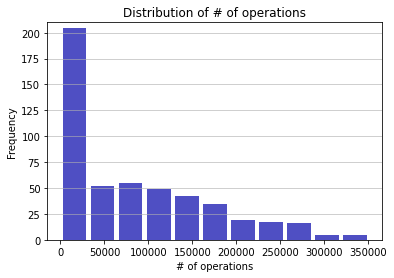

ZR4_bb.txt
	mean=3.16
	var=3.493
	max=8
	min=0


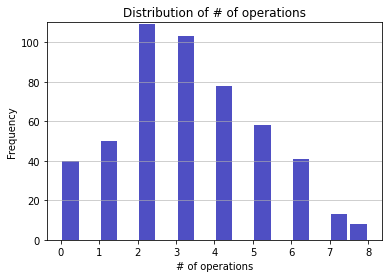

ZR20_bb.txt
	mean=26976.58
	var=590166771.006
	max=98689
	min=0


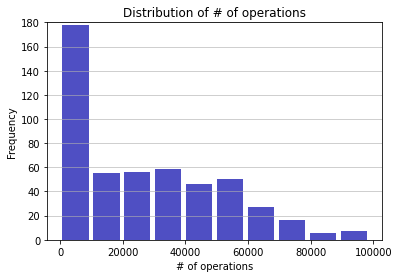

ZR15_bb.txt
	mean=1288.946
	var=1119313.366
	max=4271
	min=0


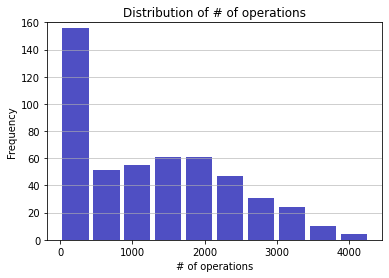

ZR25_bb.txt
	mean=5114202.786
	var=6665074226251.223
	max=13139603
	min=483104


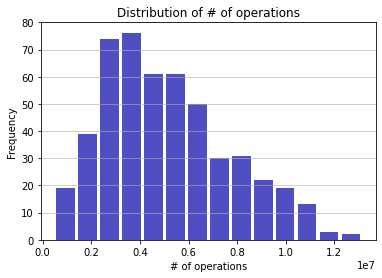

ZR10_bb.txt
	mean=77.368
	var=2452.061
	max=205
	min=0


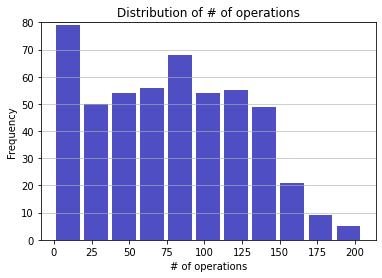

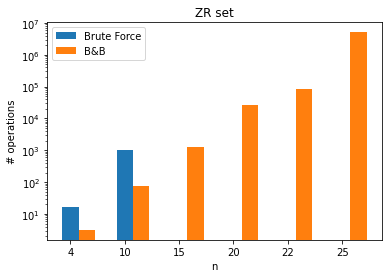

Brute Force
---------------
NR4_bf.txt
	mean=16
	var=0
	max=16
	min=16
NR10_bf.txt
	mean=1024
	var=0
	max=1024
	min=1024

Branch & Bound
---------------
NR4_bb.txt
	mean=3.066
	var=14.579
	max=15
	min=0


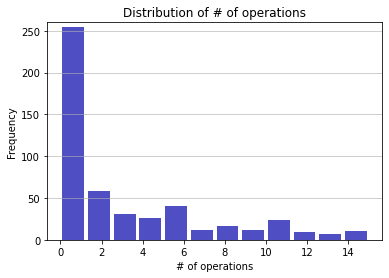

NR22_bb.txt
	mean=652626.246
	var=1641210048085.881
	max=4194267
	min=0


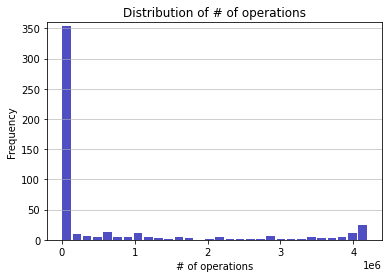

NR20_bb.txt
	mean=154225.908
	var=91855449087.711
	max=1048519
	min=0


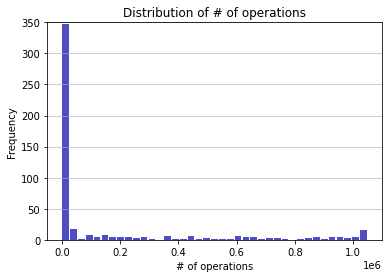

NR15_bb.txt
	mean=4412.048
	var=75361912.326
	max=32746
	min=0


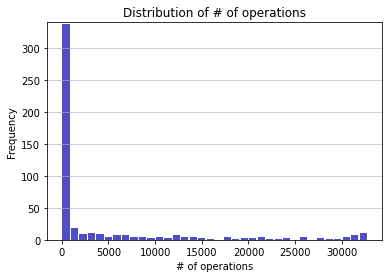

NR10_bb.txt
	mean=136.6
	var=65915.996
	max=1010
	min=0


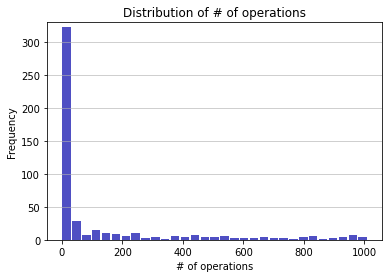

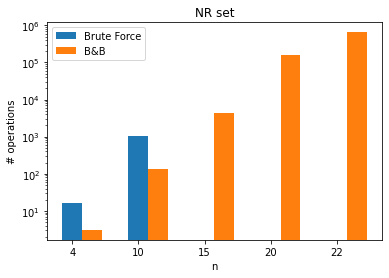

In [6]:
a = Analyzer()
a.analyze("ZR")
a.analyze("NR")